In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt

import pyMELTScalc as M

sys.path.append(r'G:\My Drive\2022\GitHub\pyMELTScalc\MELTS')
#sys.path.append('G:/My Drive/2022/MELTS/MELTS_Matlab-master/package')

import time
import random

In [2]:
comp = {'SiO2_Liq': 76.51,
       'TiO2_Liq': 0.09,
       'Al2O3_Liq': 12.23,
       'FeOt_Liq': 0.97,
       'MgO_Liq': 0.06,
       'CaO_Liq': 0.81,
       'Na2O_Liq': 4.32,
       'K2O_Liq': 4.78,
       'H2O_Liq': 5.40,
       'CO2_Liq': 0.05,
        'MnO_Liq': 0.0,
        'P2O5_Liq': 0.0,
        'Cr2O3_Liq': 0.0,
       'Fe3Fet_Liq': 0.05}

In [3]:
Start = time.time()
P_bar = np.linspace(250, 5000, 40)
phases = ['quartz1', 'plagioclase1', 'k-feldspar1']
Results = M.findSaturationPressure(comp = comp, 
                                   Model = "MELTSv1.1.0", 
                                   cores = 8,
                                   phases = phases,
                                   P_bar = P_bar, 
                                   T_initial_C = 900,
                                   dt_C = 50, 
                                   T_step_C = 1, 
                                   T_cut_C = 10,
                                   find_min = True)
print(time.time() - Start)

257.85135221481323


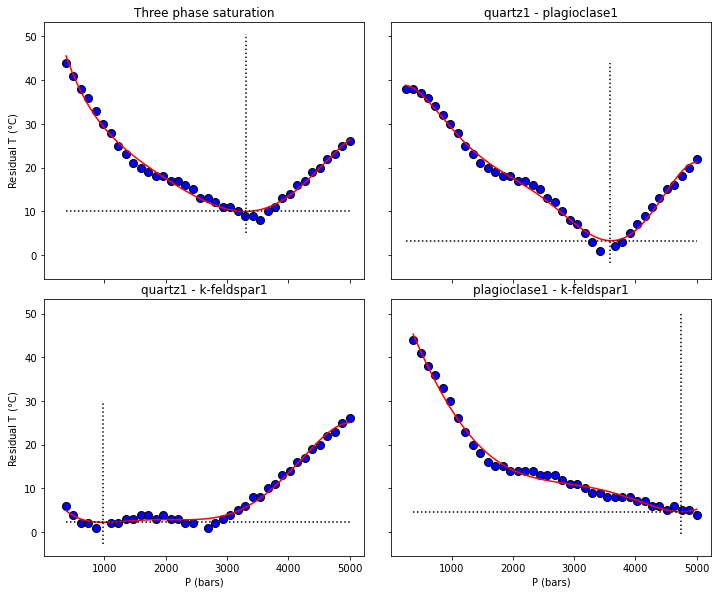

In [4]:
M.residualT_plot(Results = Results, P_bar = P_bar, phases = phases)

In [5]:
H2O_Liq = np.linspace(0.25, 6, 15)
Results = M.findSaturationPressure(comp = comp, 
                                   Model = "MELTSv1.0.2", 
                                   cores = 20,
                                   phases = phases,
                                   P_bar = P_bar, 
                                   T_initial_C = 900,
                                   dt_C = 50, 
                                   T_step_C = 1, 
                                   T_cut_C = 10,
                                   H2O_Liq = H2O_Liq,
                                   find_min = True)

  0%|          | 0/2 [00:00<?, ?it/s]

In [6]:
Results['CurveMin']

{'Res_ab': {'Res_min': 2.0640697690685377,
  'P_min': 3162.0603015075376,
  'H2O_min': 5.642482374337727,
  'z_new': <scipy.interpolate.fitpack2.SmoothBivariateSpline at 0x1f25a43a4f0>,
  'sat_surface': <scipy.interpolate.fitpack2.LSQUnivariateSpline at 0x1f1ffaa9cd0>,
  'test': 'Pass'},
 'Res_ac': {'Res_min': -1.754500084064707,
  'P_min': 920.8542713567839,
  'H2O_min': 3.421710754768246,
  'z_new': <scipy.interpolate.fitpack2.SmoothBivariateSpline at 0x1f25a43a460>,
  'sat_surface': <scipy.interpolate.fitpack2.LSQUnivariateSpline at 0x1f1ffaa9cd0>,
  'test': 'Pass'},
 'Res_abc': {'Res_min': 4.752286199325891,
  'P_min': 3077.889447236181,
  'H2O_min': 5.654528845981671,
  'z_new': <scipy.interpolate.fitpack2.SmoothBivariateSpline at 0x1f25a43a3d0>,
  'sat_surface': <scipy.interpolate.fitpack2.LSQUnivariateSpline at 0x1f1ffaa9cd0>,
  'test': 'Pass'},
 'Res_bc': {'Res_min': 1.3183189252625986,
  'P_min': 4060.3015075376884,
  'H2O_min': 5.654528845981671,
  'z_new': <scipy.interpolate

In [8]:
%matplotlib
M.residualT_plot(Results = Results, P_bar = P_bar, phases = phases, H2O_Liq = H2O_Liq)


Using matplotlib backend: Qt5Agg
